<a href="https://colab.research.google.com/github/mradul71/Epilepsy-Seizure-Detection/blob/main/ongoing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 13.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=61679885392cfe272b3eced091e5685fb865d08582e237f95a514bcc4ad448b4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 10.3 MB/s 
     |████████████████████████████████| 2.4 MB 51.1 MB/s 


# **Getting the names of all the available files of all patients**

In [ ]:
import wfdb 

dbs = wfdb.get_dbs()
records_list = wfdb.io.get_record_list('chbmit', records='all')
print(records_list)


['chb01/chb01_01.edf', 'chb01/chb01_02.edf', 'chb01/chb01_03.edf', 'chb01/chb01_04.edf', 'chb01/chb01_05.edf', 'chb01/chb01_06.edf', 'chb01/chb01_07.edf', 'chb01/chb01_08.edf', 'chb01/chb01_09.edf', 'chb01/chb01_10.edf', 'chb01/chb01_11.edf', 'chb01/chb01_12.edf', 'chb01/chb01_13.edf', 'chb01/chb01_14.edf', 'chb01/chb01_15.edf', 'chb01/chb01_16.edf', 'chb01/chb01_17.edf', 'chb01/chb01_18.edf', 'chb01/chb01_19.edf', 'chb01/chb01_20.edf', 'chb01/chb01_21.edf', 'chb01/chb01_22.edf', 'chb01/chb01_23.edf', 'chb01/chb01_24.edf', 'chb01/chb01_25.edf', 'chb01/chb01_26.edf', 'chb01/chb01_27.edf', 'chb01/chb01_29.edf', 'chb01/chb01_30.edf', 'chb01/chb01_31.edf', 'chb01/chb01_32.edf', 'chb01/chb01_33.edf', 'chb01/chb01_34.edf', 'chb01/chb01_36.edf', 'chb01/chb01_37.edf', 'chb01/chb01_38.edf', 'chb01/chb01_39.edf', 'chb01/chb01_40.edf', 'chb01/chb01_41.edf', 'chb01/chb01_42.edf', 'chb01/chb01_43.edf', 'chb01/chb01_46.edf', 'chb02/chb02_01.edf', 'chb02/chb02_02.edf', 'chb02/chb02_03.edf', 'chb02/ch

# **Patient codes.**

In [ ]:
part_codes = sorted(list(set([record.split('/')[0] for record in records_list])))
print(part_codes)

['chb01', 'chb02', 'chb03', 'chb04', 'chb05', 'chb06', 'chb07', 'chb08', 'chb09', 'chb10', 'chb11', 'chb12', 'chb13', 'chb14', 'chb15', 'chb16', 'chb17', 'chb18', 'chb19', 'chb20', 'chb21', 'chb22', 'chb23', 'chb24']


## **Readng the summary file**

In [ ]:
import os
from urllib.request import urlretrieve

def get_content(part_code):
  url = "https://physionet.org/physiobank/database/chbmit/"+part_code+'/'+part_code+'-summary.txt'
  filename = "./chbmit.txt"

  urlretrieve(url,filename)
  
  # read the file into a list
  with open(filename, encoding='UTF-8') as f:
      # read all the document into a list of strings (each line a new string)
      content = f.readlines()
      os.remove(filename)
  return content

get_content(part_codes[0])

['Data Sampling Rate: 256 Hz\n',
 '*************************\n',
 '\n',
 'Channels in EDF Files:\n',
 '**********************\n',
 'Channel 1: FP1-F7\n',
 'Channel 2: F7-T7\n',
 'Channel 3: T7-P7\n',
 'Channel 4: P7-O1\n',
 'Channel 5: FP1-F3\n',
 'Channel 6: F3-C3\n',
 'Channel 7: C3-P3\n',
 'Channel 8: P3-O1\n',
 'Channel 9: FP2-F4\n',
 'Channel 10: F4-C4\n',
 'Channel 11: C4-P4\n',
 'Channel 12: P4-O2\n',
 'Channel 13: FP2-F8\n',
 'Channel 14: F8-T8\n',
 'Channel 15: T8-P8\n',
 'Channel 16: P8-O2\n',
 'Channel 17: FZ-CZ\n',
 'Channel 18: CZ-PZ\n',
 'Channel 19: P7-T7\n',
 'Channel 20: T7-FT9\n',
 'Channel 21: FT9-FT10\n',
 'Channel 22: FT10-T8\n',
 'Channel 23: T8-P8\n',
 '\n',
 'File Name: chb01_01.edf\n',
 'File Start Time: 11:42:54\n',
 'File End Time: 12:42:54\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_02.edf\n',
 'File Start Time: 12:42:57\n',
 'File End Time: 13:42:57\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_03.edf\n',
 'File Sta

## **Extracting all the patient related information**

In [ ]:
import re
part_info_dict = {}

def info_dict(content):
  
  line_nos=len(content)
  line_no=1

  channels = []
  file_name = []
  file_info_dict={}

  for line in content:

    if re.findall('Channel \d+', line):
      channel = line.split(': ')
      channel = channel[-1].replace("\n", "")
      channels.append(channel)

    elif re.findall('File Name', line):
      if file_name:
        part_info_dict[file_name] = file_info_dict

      file_name = re.findall('\w+\d+_\d+|\w+\d+\w+_\d+', line)[0]

      file_info_dict = {}
      file_info_dict['Channels'] = list(set(channels))
      file_info_dict['Start Time'] = ''
      file_info_dict['End Time'] = ''
      file_info_dict['Seizures Window'] = []

    elif re.findall('File Start Time', line):
      file_info_dict['Start Time'] = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('File End Time', line):
      file_info_dict['End Time'] = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('Seizure Start Time|Seizure End Time|Seizure \d+ Start Time|Seizure \d+ End Time', line):
      file_info_dict['Seizures Window'].append(int(re.findall('\d+', line)[-1]))

    if line_no == line_nos:
      part_info_dict[file_name] = file_info_dict

    line_no+=1
    
        
for part_code in part_codes:
  content = get_content(part_code)
  info_dict(content)

print(part_info_dict)

{'chb01_01': {'Channels': ['T7-FT9', 'C4-P4', 'P3-O1', 'P7-O1', 'FT9-FT10', 'P4-O2', 'FP2-F4', 'T8-P8', 'F8-T8', 'CZ-PZ', 'F7-T7', 'P8-O2', 'FP1-F3', 'F4-C4', 'C3-P3', 'FP1-F7', 'F3-C3', 'T7-P7', 'FZ-CZ', 'FP2-F8', 'P7-T7', 'FT10-T8'], 'Start Time': '11:42:54', 'End Time': '12:42:54', 'Seizures Window': []}, 'chb01_02': {'Channels': ['T7-FT9', 'C4-P4', 'P3-O1', 'P7-O1', 'FT9-FT10', 'P4-O2', 'FP2-F4', 'T8-P8', 'F8-T8', 'CZ-PZ', 'F7-T7', 'P8-O2', 'FP1-F3', 'F4-C4', 'C3-P3', 'FP1-F7', 'F3-C3', 'T7-P7', 'FZ-CZ', 'FP2-F8', 'P7-T7', 'FT10-T8'], 'Start Time': '12:42:57', 'End Time': '13:42:57', 'Seizures Window': []}, 'chb01_03': {'Channels': ['T7-FT9', 'C4-P4', 'P3-O1', 'P7-O1', 'FT9-FT10', 'P4-O2', 'FP2-F4', 'T8-P8', 'F8-T8', 'CZ-PZ', 'F7-T7', 'P8-O2', 'FP1-F3', 'F4-C4', 'C3-P3', 'FP1-F7', 'F3-C3', 'T7-P7', 'FZ-CZ', 'FP2-F8', 'P7-T7', 'FT10-T8'], 'Start Time': '13:43:04', 'End Time': '14:43:04', 'Seizures Window': [2996, 3036]}, 'chb01_04': {'Channels': ['T7-FT9', 'C4-P4', 'P3-O1', 'P7-O1',

#**Getting all the seizure file names and their respective seizure windows**

In [ ]:
seizure_data = {}
non_seizure_files = {}

for key in part_info_dict.keys():
  seizure_data_single = []
  if key.split('_')[0] == "chb02":
    continue
  if part_info_dict[key]['Seizures Window'] != []:
    index=0
    while index < len(part_info_dict[key]['Seizures Window']):
      temp=[]
      temp.append(part_info_dict[key]['Seizures Window'][index])
      temp.append(part_info_dict[key]['Seizures Window'][index+1])
      seizure_data_single.append(temp)
      index = index+2
    if seizure_data_single != []:
      seizure_data[key] = seizure_data_single

  elif key.split('_')[0] in non_seizure_files:
    continue
  else:
    non_seizure_files[key.split('_')[0]] = key

print(non_seizure_files)
print(seizure_data)

{'chb01': 'chb01_01', 'chb03': 'chb03_05', 'chb04': 'chb04_01', 'chb05': 'chb05_01', 'chb06': 'chb06_02', 'chb07': 'chb07_01', 'chb08': 'chb08_03', 'chb09': 'chb09_01', 'chb10': 'chb10_01', 'chb11': 'chb11_01', 'chb12': 'chb12_19', 'chb13': 'chb13_02', 'chb14': 'chb14_01', 'chb15': 'chb15_01', 'chb16': 'chb16_01', 'chb17a': 'chb17a_05', 'chb17b': 'chb17b_57', 'chb17c': 'chb17c_02', 'chb18': 'chb18_01', 'chb19': 'chb19_01', 'chb20': 'chb20_01', 'chb21': 'chb21_01', 'chb22': 'chb22_01', 'chb23': 'chb23_07'}
{'chb01_03': [[2996, 3036]], 'chb01_04': [[1467, 1494]], 'chb01_15': [[1732, 1772]], 'chb01_16': [[1015, 1066]], 'chb01_18': [[1720, 1810]], 'chb01_21': [[327, 420]], 'chb01_26': [[1862, 1963]], 'chb03_01': [[362, 414]], 'chb03_02': [[731, 796]], 'chb03_03': [[432, 501]], 'chb03_04': [[2162, 2214]], 'chb03_34': [[1982, 2029]], 'chb03_35': [[2592, 2656]], 'chb03_36': [[1725, 1778]], 'chb04_05': [[7804, 7853]], 'chb04_08': [[6446, 6557]], 'chb04_28': [[1679, 1781], [3782, 3898]], 'chb05

In [ ]:
import pandas as pd
import re

all_channels = []

for key in part_info_dict.keys():
    all_channels.extend(part_info_dict[key]['Channels'])

all_channels = pd.Series(all_channels)

channel_counts = all_channels.value_counts()
channel_counts

P8-O2      675
F7-T7      675
FP2-F8     675
FZ-CZ      675
T7-P7      675
          ... 
P8          13
C2          13
01          13
CP4         13
LOC-ROC     11
Length: 87, dtype: int64

#**Getting all the common channels of the files**

In [ ]:
threshold = len(part_info_dict.keys())
channel_keeps = list(channel_counts[channel_counts >= threshold].index)
channel_keeps

['P8-O2',
 'F7-T7',
 'FP2-F8',
 'FZ-CZ',
 'T7-P7',
 'F3-C3',
 'FP1-F7',
 'C3-P3',
 'F4-C4',
 'FP1-F3',
 'C4-P4',
 'CZ-PZ',
 'F8-T8',
 'T8-P8',
 'FP2-F4',
 'P4-O2',
 'P7-O1',
 'P3-O1']

#**Getting seizure data and concatinating them vertically**

In [ ]:
import pandas as pd
import numpy as np
import pyedflib

def data_load(file, selected_channels=[]):
  print("reading from " + file)

  try: 
    url = "https://physionet.org/physiobank/database/chbmit/"+file
    filename = "./chbmit.edf"

    urlretrieve(url,filename)
    f = pyedflib.EdfReader(filename)
    os.remove(filename)
    
    if len(selected_channels) == 0:
      selected_channels = f.getSignalLabels()

    channel_names = f.getSignalLabels()
    channel_freq = f.getSampleFrequencies()

    sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
    for i, channel in enumerate(selected_channels):
      sigbufs[:, i] = f.readSignal(channel_names.index(channel))
    
    df = pd.DataFrame(sigbufs, columns = selected_channels).astype('float64')
    index_increase = np.linspace(0, len(df)/channel_freq[0], len(df), endpoint=False)

    seconds = np.floor(index_increase).astype('uint16')
    df['Time'] = seconds
    df.columns.name = 'Channel'
    return df, channel_freq[0]

  except:
    OSError
    return pd.DataFrame(), None

all_df=[]
time_interval = 0;
patient_check = {}
cnt=0
patient_number = 5

for x, y in list(seizure_data.items()):
  if (x.split('_')[0] not in patient_check):
    cnt+=1
    j=x.split('_')[0]
    patient_check[j] = 1
    if cnt > patient_number:
      break
    
  filename = x.split('_')[0]+"/"+x+".edf"
  interval = y
  raw_data, freq = data_load(filename, channel_keeps)
  raw_data_final = raw_data.iloc[interval[0][0]*256 : ((interval[0][1])*256), :]
  time_interval += (interval[0][1] - interval[0][0])
  all_df.append(raw_data_final)

final_df = pd.concat(all_df, ignore_index=True)
print(time_interval)

reading from chb01/chb01_03.edf
reading from chb01/chb01_04.edf
reading from chb01/chb01_15.edf
reading from chb01/chb01_16.edf
reading from chb01/chb01_18.edf
reading from chb01/chb01_21.edf
reading from chb01/chb01_26.edf
reading from chb03/chb03_01.edf
reading from chb03/chb03_02.edf
reading from chb03/chb03_03.edf
reading from chb03/chb03_04.edf
reading from chb03/chb03_34.edf
reading from chb03/chb03_35.edf
reading from chb03/chb03_36.edf
reading from chb04/chb04_05.edf
reading from chb04/chb04_08.edf
reading from chb04/chb04_28.edf
reading from chb05/chb05_06.edf
reading from chb05/chb05_13.edf
reading from chb05/chb05_16.edf
reading from chb05/chb05_17.edf
reading from chb05/chb05_22.edf
reading from chb06/chb06_01.edf
reading from chb06/chb06_04.edf
reading from chb06/chb06_09.edf
reading from chb06/chb06_10.edf
reading from chb06/chb06_13.edf
reading from chb06/chb06_18.edf
reading from chb06/chb06_24.edf
1767


In [ ]:
print(time_interval)

1767


In [ ]:
print(final_df)

Channel      P8-O2      F7-T7      FP2-F8       FZ-CZ       T7-P7      F3-C3  \
0       -57.240537  45.909646   62.319902   42.783883   55.677656  42.393162   
1       -51.379731  50.989011   76.385836   35.750916   56.459096  45.518926   
2       -70.134310  59.194139   75.213675   25.592186   54.896215  50.207570   
3       -81.855922  64.273504   76.385836   20.122100   52.161172  54.505495   
4       -76.776557  58.021978   93.577534   21.684982   46.691087  53.333333   
...            ...        ...         ...         ...         ...        ...   
452347   -8.009768 -82.637363  105.689866  134.603175  112.332112  34.969475   
452348   11.135531  -7.228327   95.921856  131.868132   34.578755  37.313797   
452349    8.009768 -14.652015   97.484737  127.179487   40.048840  34.188034   
452350    1.367521 -43.956044   90.451770  123.663004   79.511600  30.671551   
452351    6.056166 -34.188034   86.935287  121.709402   76.776557  25.592186   

Channel     FP1-F7      C3-P3       F4-

In [ ]:
EXAMPLE_FILE = records_list[17]
EXAMPLE_ID = EXAMPLE_FILE.split('/')[1].split('.')[0]
EXAMPLE_ID

'chb01_18'

In [ ]:
import mne
def mne_object(data, freq, events = None):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  if events:
    start_times = np.array(events[::2])
    end_times = np.array(events[1::2])
    anno_length = end_times-start_times
    event_name = np.array(['Ictal']*len(anno_length))

    raw.set_annotations(mne.Annotations(start_times,
                                      anno_length,
                                      event_name))

  return raw

mne_data = mne_object(raw_data, freq, part_info_dict[EXAMPLE_ID]['Seizures Window'])

print(mne_data.info['ch_names'])



Creating RawArray with float64 data, n_channels=19, n_times=3686400
    Range : 0 ... 3686399 =      0.000 ... 14399.996 secs
Ready.
['FP2-F8', 'P8-O2', 'F4-C4', 'F7-T7', 'C3-P3', 'P3-O1', 'FP1-F3', 'F8-T8', 'FP1-F7', 'FZ-CZ', 'P4-O2', 'T8-P8', 'C4-P4', 'F3-C3', 'P7-O1', 'FP2-F4', 'CZ-PZ', 'T7-P7', 'Time']


In [ ]:
replace_dict = {}
drop_list = []
# for the channel names in the data...
for channel_name in mne_data.info['ch_names']:
    # get the name to change too
    name_change = re.findall('\w+',channel_name)[0].title()
    # check if it is already in the change list
    if name_change in list(replace_dict.values()):
        drop_list.append(channel_name)
    else:
        # if its not already there get the origional name and what we want to 
        # change it to
        replace_dict[channel_name] = name_change


# drop the ones that would be repeats

mne_data.drop_channels(drop_list)
mne_data.drop_channels('Time')
# rename the channels
print(mne_data.info['ch_names'])
replace_dict.popitem()
mne_data.rename_channels(replace_dict)
# set the standard montage
mne_data.set_montage('standard_1020',on_missing='ignore')

['FP2-F8', 'P8-O2', 'F4-C4', 'F7-T7', 'C3-P3', 'P3-O1', 'FP1-F3', 'F8-T8', 'FZ-CZ', 'P4-O2', 'T8-P8', 'C4-P4', 'F3-C3', 'P7-O1', 'CZ-PZ', 'T7-P7']


<RawArray | 16 x 3686400 (14400.0 s), ~450.0 MB, data loaded>

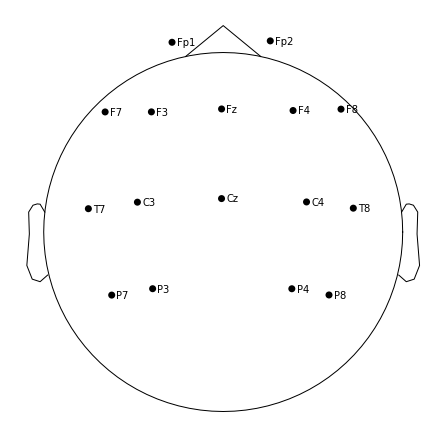

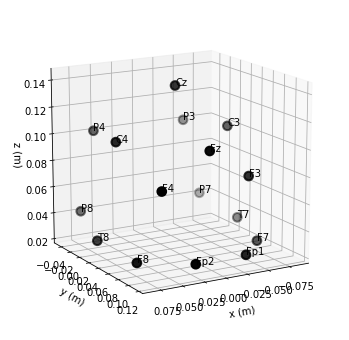

In [ ]:
import matplotlib.pyplot as plt
mne_data.plot_sensors(kind='topomap', show_names=True, to_sphere=True);
fig = mne_data.plot_sensors(kind='3d', show_names=True, show=False)
fig = fig.gca().view_init(azim=60, elev=15)


1720
0
1


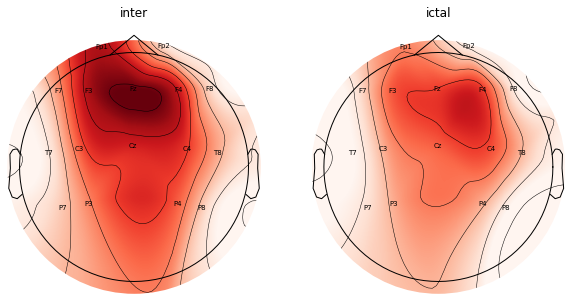

In [ ]:
from scipy import signal
def ave_freq(data):
    win = 4 * freq
    freqs, psd = signal.welch(data, freq, nperseg=win, scaling='spectrum')
    #print(freqs[4:160])
    return psd[:,4:160].mean(1)
seiz_start_time = part_info_dict[EXAMPLE_ID]['Seizures Window'][0]
print(seiz_start_time)
inter_array = mne_data[:, 50*freq:80*freq][0]
ictal_array = mne_data[:, (seiz_start_time*freq):(seiz_start_time*freq)+30*freq][0]
topo_df = pd.DataFrame([ave_freq(inter_array),ave_freq(ictal_array)], index=['inter', 'ictal'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs = axs.flatten()
for i, data_class in enumerate(topo_df.T):
    print(i)
    topo, cn = mne.viz.plot_topomap(topo_df.loc[data_class],
                                    mne_data.info,
                                    show=False,
                                    sensors=False,
                                    names=mne_data.info['ch_names'], 
                                    show_names=True,
                                    axes = axs[i],
                                    vmin = topo_df.values.min(),
                                    vmax = topo_df.values.max())
    axs[i].set_title(data_class)
    
fig.show()

1720


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spe

0
1
2
3
4
5


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 768, using nperseg = 768
  .format(nperseg, input_length))


6
7
8
9


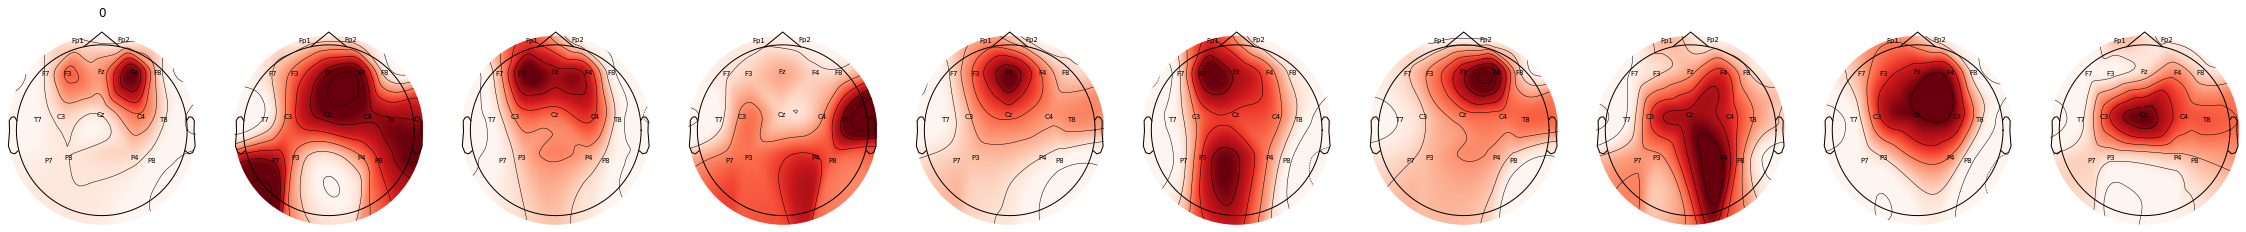

In [ ]:
from scipy import signal
def ave_freq(data):
    win = 4 * freq
    freqs, psd = signal.welch(data, freq, nperseg=win, scaling='spectrum')
    return psd[:,4:160].mean(1)
seiz_start_time = part_info_dict[EXAMPLE_ID]['Seizures Window'][0]
print(seiz_start_time)

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(40,40))


for j in range(0,30,3):

  ictal_array = mne_data[:, (seiz_start_time*freq)+j*freq:(seiz_start_time*freq)+(j+3)*freq][0]
  topo_df = pd.DataFrame([ave_freq(ictal_array)])



  axs = axs.flatten()
  for i, data_class in enumerate(topo_df.T):
      
      iterate=int(i+j/3);
      print(iterate);
      topo, cn = mne.viz.plot_topomap(topo_df.loc[data_class],
                                      mne_data.info,
                                      show=False,
                                      sensors=False,
                                      names=mne_data.info['ch_names'], 
                                      show_names=True,
                                      axes = axs[iterate],
                                      vmin = topo_df.values.min(),
                                      vmax = topo_df.values.max())
      axs[i].set_title(data_class)
    
fig.show()

#**Plotting the seizure data**

reading from chb01/chb01_03.edf


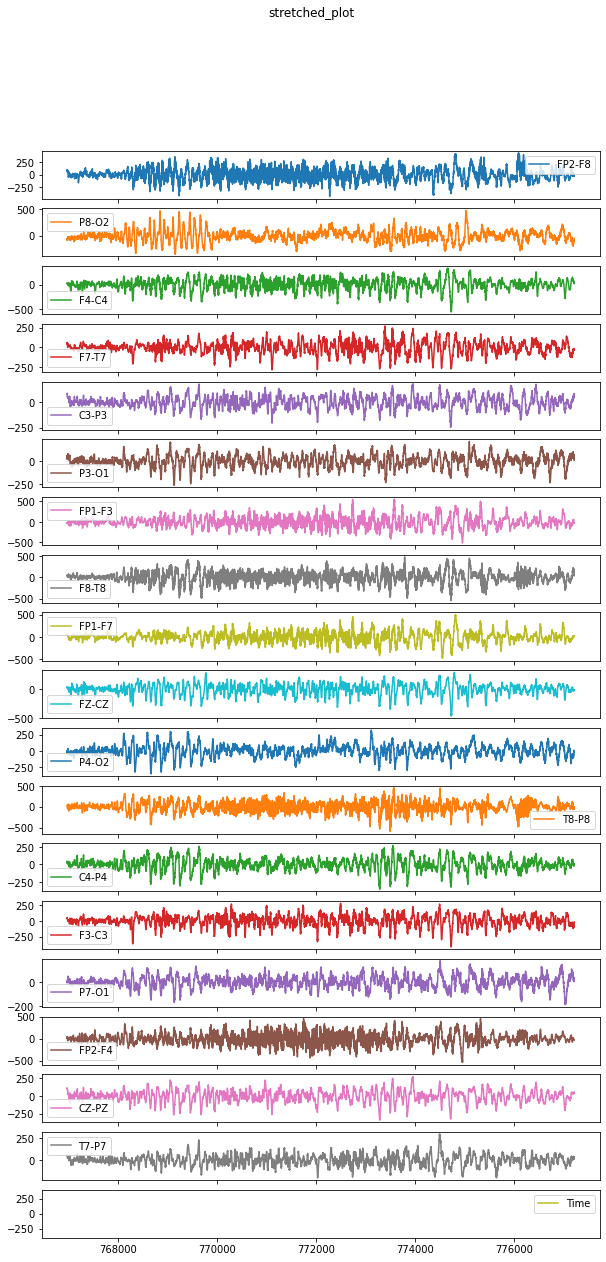

In [ ]:
import matplotlib.pyplot as plt
one_file, f = data_load("chb01/chb01_03.edf", channel_keeps)
seizure = one_file.iloc[2996*256:3036*256, :]
seizure.plot(subplots=True, title='stretched_plot', figsize=(10, 20))

plt.ylim(-400, 400)
plt.show()

#**Plotting the non-seizure data**

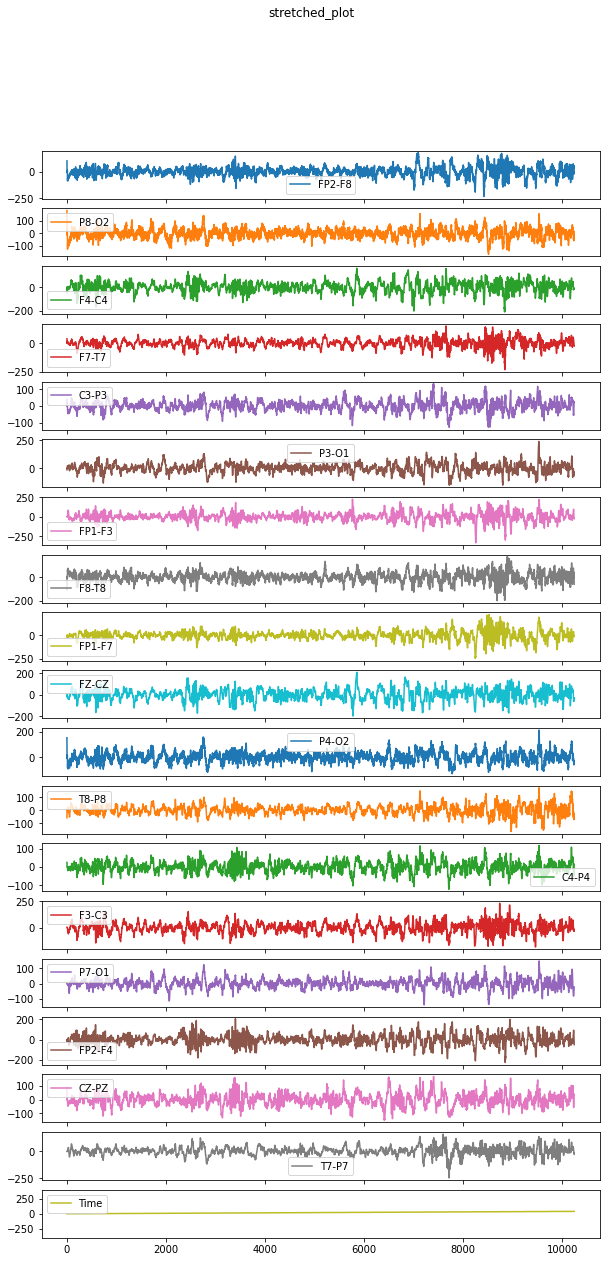

In [ ]:
time_int = (3036 - 2996)*256
non_seizure = one_file.iloc[0:time_int, :]
non_seizure.plot(subplots=True, title='stretched_plot', figsize=(10, 20))
plt.ylim(-400, 400)
plt.show()

#**Extracting the non-seizure data of the same length and equally from all the patients**

In [ ]:
time_interval=1767
single_time_interval = time_interval // patient_number
non_seizure_data = []
cnt=0
for patient, non_seizure_file in list(non_seizure_files.items()):
  if cnt >= patient_number:
    break;
  else:
    cnt+=1
  non_seizure_file_name = non_seizure_file.split('_')[0]+"/"+non_seizure_file+".edf"
  raw_data, freq = data_load(non_seizure_file_name, channel_keeps)
  raw_data = raw_data.iloc[0:single_time_interval*256, :]
  non_seizure_data.append(raw_data)

non_seizure_data = pd.concat(non_seizure_data, ignore_index=True)
print(non_seizure_data)

reading from chb01/chb01_01.edf
reading from chb03/chb03_05.edf
reading from chb04/chb04_01.edf
reading from chb05/chb05_01.edf
reading from chb06/chb06_02.edf
Channel       P8-O2       F7-T7      FP2-F8       FZ-CZ      T7-P7  \
0         74.822955 -104.517705 -267.838828 -106.080586 -42.783883   
1          0.195360    0.195360    0.195360    0.195360   0.195360   
2         -0.195360    0.195360    0.195360    0.195360   0.195360   
3         -2.148962    0.586081   -0.586081    0.195360   0.195360   
4          0.976801    0.195360   -0.195360    0.195360   0.195360   
...             ...         ...         ...         ...        ...   
451835    90.842491 -145.543346  -43.565324  -43.565324  64.664225   
451836    91.623932 -153.357753  -59.584860  -45.128205  68.180708   
451837    97.484737 -151.794872  -71.697192  -42.002442  73.650794   
451838    99.438339 -123.663004  -84.590965  -40.830281  49.816850   
451839   103.736264 -115.457875  -93.186813  -36.923077  37.313797   


In [ ]:
final_df.to_csv('patient_data_3.csv')

In [ ]:
#seizure_data
import pandas as pd
data_sample = pd.read_csv('patient_data_3.csv')
data_sample_modify=data_sample.iloc[:,1:19]

#non_seizure-data
non_seizure_data=non_seizure_data.iloc[:,0:18]

#**Plotting the seizure and non-seizure data channel vise.**

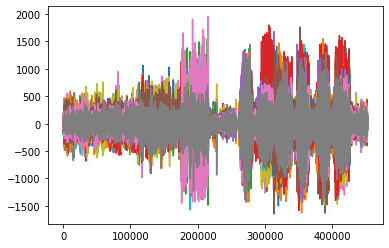

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_sample_modify)

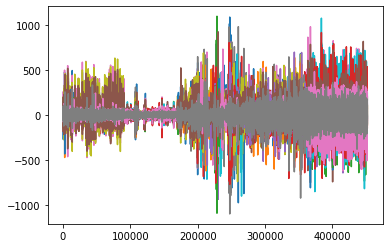

In [ ]:
import matplotlib.pyplot as plt
plt.plot(non_seizure_data)

#**Filtering data**

In [ ]:
import mne
filtered_data_seizure=data_sample_modify;
for i in range(0,18):
  filter_data=mne.filter.filter_data(data_sample_modify.iloc[:,i].to_numpy(),256,0,40);
  filtered_data_seizure.iloc[:,i]=pd.DataFrame(filter_data);

#non_seizure
import mne
filtered_data_non_seizure=non_seizure_data;
for i in range(0,18):
  filter_data_x=mne.filter.filter_data(non_seizure_data.iloc[:,i].to_numpy(),256,0,40);
  filtered_data_non_seizure.iloc[:,i]=pd.DataFrame(filter_data_x);


Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 85 samples (0.332 sec)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 85 samples (0.332 sec)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwi

In [ ]:
print(filtered_data_non_seizure.shape)
print(filtered_data_seizure.shape)

(451840, 18)
(452352, 18)


In [ ]:
from scipy import signal

f, Pxx_den = signal.periodogram(filtered_data_seizure['FP2-F8'], 256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-1, 1e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()

NameError: ignored

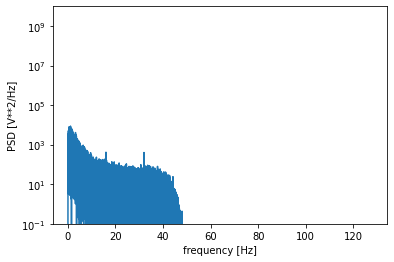

In [ ]:
from scipy import signal

f, Pxx_den = signal.periodogram(filtered_data_non_seizure['FP2-F8'], 256)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-1, 1e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()

#**Extracting features from the data**

In [ ]:
import pywt
import math
import statistics as st;
from scipy.stats import skew,kurtosis

def wavelet(signal_col, features):

  coeffs = pywt.wavedec(signal_col, 'db4', level=5);
  ca5,cd5,cd4,cd3,cd2,cd1 = coeffs

  f1=st.mean(ca5);
  f2=st.mean(cd5);
  f3=st.mean(cd4);
  f4=st.mean(cd3);

  f5=st.stdev(ca5);
  f6=st.stdev(cd5);
  f7=st.stdev(cd4);
  f8=st.stdev(cd3);

  f9=skew(ca5);
  f10=skew(cd5);
  f11=skew(cd4);
  f12=skew(cd3);

  f13=np.sqrt(abs(st.mean(ca5**2)));
  f14=np.sqrt(abs(st.mean(cd5**2)));
  f15=np.sqrt(abs(st.mean(cd4**2)));
  f16=np.sqrt(abs(st.mean(cd3**2)));

  f17=kurtosis(ca5);
  f18=kurtosis(cd5);
  f19=kurtosis(cd4);
  f20=kurtosis(cd3);

  features.extend([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20])

  
def feature_extraction(signal):
  features = []
  col_length=len(signal.columns);
  for i in range(col_length):
    feature=wavelet(signal.iloc[:,i], features);
  # print(len(features))
  return features

segment_length=512;
num_segments=math.floor(len(filtered_data_seizure)/512)
num_segments_non=math.floor(len(filtered_data_non_seizure)/512)
data_table=[]
for i in range(num_segments):
  signal=filtered_data_seizure.iloc[i*segment_length:(i+1)*segment_length,:]
  feat=feature_extraction(signal);
  feat.extend(["Seizure"])
  data_table.append(feat)

for i in range(num_segments_non):
  signal=filtered_data_non_seizure.iloc[i*segment_length:(i+1)*segment_length,:]
  feat=feature_extraction(signal);
  feat.extend(["Non-Seizure"])
  data_table.append(feat)  

data_table = pd.DataFrame(data_table)
print(data_table)



             0          1          2         3           4           5    \
0      53.494483   4.071751   5.116842 -2.108364  146.814408  148.429943   
1     153.849557  23.161493   1.199024 -1.579627  373.487247  214.986320   
2     230.071750 -33.975291   5.520616 -4.892615  586.009031  296.245956   
3     -43.671599   6.192018   4.690600 -5.770931  405.640293  222.662580   
4      69.626576  10.932114  -1.268273 -1.736747  532.750182  200.600801   
...          ...        ...        ...       ...         ...         ...   
1760 -231.158842 -60.436137 -17.505573 -4.637296  545.939835  296.240482   
1761 -179.982610 -35.641613   6.492714 -7.688181  662.109782  191.453678   
1762  -17.074527   6.858577  -2.927148  1.450529  319.955104  181.423257   
1763  359.613470 -10.382033  -0.504603  0.163978  730.340735  227.044817   
1764  -51.535796  25.674870   2.860236  2.931338  253.583149  238.645934   

             6          7         8         9    ...       351         352  \
0     136

#**Training the model for the acquired data**

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data_table.iloc[:, :-1], data_table.iloc[:, -1], test_size=0.3)
# print(y_train, y_test)

print(data_table.iloc[0,0:20])

0      53.494483
1       4.071751
2       5.116842
3      -2.108364
4     146.814408
5     148.429943
6     136.332204
7      30.992357
8       0.031914
9      -0.176869
10      0.464524
11      0.123992
12    153.089456
13    145.074455
14    134.623676
15     30.842334
16     -0.380117
17     -0.763374
18      -0.35325
19     -0.099039
Name: 0, dtype: object


In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test);

[[240  22]
 [ 18 250]]
0.9245283018867925


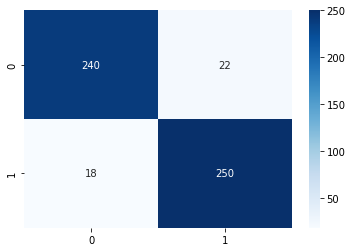

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred);
print(matrix)
print(accuracy)

import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='g',cmap='Blues')

[[257   5]
 [  7 261]]
0.9773584905660377


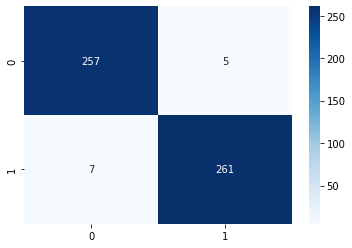

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier();
rfmodel.fit(X_train,y_train);
y_predrf=rfmodel.predict(X_test);

from sklearn.metrics import confusion_matrix,accuracy_score
matrix_rf=confusion_matrix(y_test,y_predrf)
accuracy_rf=accuracy_score(y_test,y_predrf);
print(matrix_rf)
print(accuracy_rf)

import seaborn as sns
sns.heatmap(matrix_rf,annot=True,fmt='g',cmap='Blues')

[[256   6]
 [ 29 239]]
0.9339622641509434


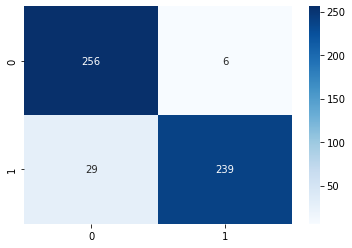

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
y_predknn=knn.predict(X_test);

from sklearn.metrics import confusion_matrix,accuracy_score
matrix_knn=confusion_matrix(y_test,y_predknn)
accuracy_knn=accuracy_score(y_test,y_predknn);
print(matrix_knn)
print(accuracy_knn)

import seaborn as sns
sns.heatmap(matrix_knn,annot=True,fmt='g',cmap='Blues')